In [1]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd

import re

## Features 

In [2]:
import re

indexes = []
features = []
with open('../homework2_exercise2/data/features', 'r') as f:
    for line in f.readlines():
        index, *feat = line.split(':')
        feat = ''.join(feat)
        feat = re.findall('"([^\"]*)"', feat)
        indexes.append(index)
    
        
        #feat += [f.split('_')[0] for f in feat]
        feat = list(set(feat))
        
        features.append(feat)

In [3]:
one_hot = MultiLabelBinarizer()
mhe = one_hot.fit_transform(features)
df = pd.DataFrame(mhe)

In [4]:
df.rename(columns=lambda x: f'feat_{x}', inplace=True)
df = df.T.drop_duplicates().T
df = df.astype(bool)
df['theorem'] = indexes

In [5]:
del mhe
del features
del indexes

# Dataset

## Ones

In [6]:
indexes_train = []
premises = []

ones = []

with open('../homework2_exercise2/data/dependencies_train', 'r') as f:
    for line in f.readlines():
        index, *prem = line.split(':')
        prem = ''.join(prem).split()
        
        indexes_train.append(index)
        premises.append(prem)
        
        for p in prem:
            ones.append((index, p))

In [7]:
ones_df = pd.DataFrame(ones, columns=['theorem', 'premise']).drop_duplicates()

In [8]:
del ones
del premises
del indexes_train

## Zeros

In [9]:
chronology = pd.read_csv('../homework2_exercise2/data/chronology_backup', squeeze=True, names=['chronology'])
def get_available_theorems(name):
    return chronology.loc[:(chronology == name).argmax()-1]

In [10]:
used_premises = ones_df.groupby('theorem')['premise'].unique()

In [11]:
FALSE_EXAMPLES_RATIO = 8

dataset_zeros = []
for theorem, theorem_premises in ones_df.groupby('theorem')['premise']:
    available_theorems = get_available_theorems(theorem)
    zero_premises = np.setdiff1d(available_theorems, theorem_premises)
    
    zeros_chosen = zero_premises[np.random.randint(0, len(zero_premises), FALSE_EXAMPLES_RATIO * theorem_premises.shape[0])]
    dataset_zeros += list(zip(
        [theorem] * len(zeros_chosen),
        zeros_chosen
    ))

/home/piotrek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
zeros_df = pd.DataFrame(dataset_zeros, columns=['theorem', 'premise'])

In [13]:
del dataset_zeros
del used_premises

### autoencoder

In [14]:
df.shape

(4564, 4769)

In [23]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64

# this is our input placeholder
input_data = Input(shape=(4768,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_data)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(4768, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

In [24]:
encoder = Model(input_data, encoded)

In [25]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
autoencoder.fit(df.drop('theorem', axis=1), df.drop('theorem', axis=1),
                epochs=400,
                batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
4564/4564 [==============================] - 2s 454us/step - loss: 0.6922
Epoch 2/400
4564/4564 [==============================] - 0s 106us/step - loss: 0.6901
Epoch 3/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.6879
Epoch 4/400
4564/4564 [==============================] - 0s 107us/step - loss: 0.6853
Epoch 5/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.6818
Epoch 6/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.6758
Epoch 7/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.6644
Epoch 8/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.6416
Epoch 9/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.5972
Epoch 10/400
4564/4564 [==============================] - 1s 126us/step - loss: 0.5229
Epoch 11/400
4564/4564 [==============================] - 1s 113us/step - loss: 0.4247
Epoc

4564/4564 [==============================] - 0s 109us/step - loss: 0.0195
Epoch 93/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.0194
Epoch 94/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0194
Epoch 95/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0193
Epoch 96/400
4564/4564 [==============================] - 0s 108us/step - loss: 0.0193
Epoch 97/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0192
Epoch 98/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0192
Epoch 99/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0192
Epoch 100/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0191
Epoch 101/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0191
Epoch 102/400
4564/4564 [==============================] - 0s 108us/step - loss: 0.0191
Epoch 103/400
4564/4564 [============================

4564/4564 [==============================] - 1s 114us/step - loss: 0.0172
Epoch 186/400
4564/4564 [==============================] - 0s 103us/step - loss: 0.0172
Epoch 187/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0172
Epoch 188/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0172
Epoch 189/400
4564/4564 [==============================] - 0s 107us/step - loss: 0.0172
Epoch 190/400
4564/4564 [==============================] - 0s 108us/step - loss: 0.0172
Epoch 191/400
4564/4564 [==============================] - 0s 107us/step - loss: 0.0171
Epoch 192/400
4564/4564 [==============================] - 0s 107us/step - loss: 0.0171
Epoch 193/400
4564/4564 [==============================] - 0s 107us/step - loss: 0.0171
Epoch 194/400
4564/4564 [==============================] - 0s 106us/step - loss: 0.0171
Epoch 195/400
4564/4564 [==============================] - 0s 108us/step - loss: 0.0171
Epoch 196/400
4564/4564 [=====================

4564/4564 [==============================] - 1s 111us/step - loss: 0.0157
Epoch 279/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0157
Epoch 280/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0157
Epoch 281/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0157
Epoch 282/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0156
Epoch 283/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0156
Epoch 284/400
4564/4564 [==============================] - 0s 107us/step - loss: 0.0156
Epoch 285/400
4564/4564 [==============================] - 0s 106us/step - loss: 0.0156
Epoch 286/400
4564/4564 [==============================] - 0s 107us/step - loss: 0.0156
Epoch 287/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0156
Epoch 288/400
4564/4564 [==============================] - 1s 113us/step - loss: 0.0155
Epoch 289/400
4564/4564 [=====================

4564/4564 [==============================] - 1s 111us/step - loss: 0.0144
Epoch 372/400
4564/4564 [==============================] - 1s 113us/step - loss: 0.0144
Epoch 373/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0144
Epoch 374/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0144
Epoch 375/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0143
Epoch 376/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.0143
Epoch 377/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.0143
Epoch 378/400
4564/4564 [==============================] - 1s 115us/step - loss: 0.0143
Epoch 379/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0143
Epoch 380/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0143
Epoch 381/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0143
Epoch 382/400
4564/4564 [=====================

In [27]:
df_autoenc = pd.DataFrame(encoder.predict(df.drop('theorem', axis=1)))

In [28]:
df_autoenc['theorem'] = df['theorem']

In [29]:
df_autoenc.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,theorem
0,0.000000,2.230879,0.330871,0.000000,2.890685,2.909945,4.458393,6.815288,0.223798,0.918627,...,0.513594,4.567061,0.000000,0.009979,0.957075,0.506411,0.858963,4.855551,1.462899,abstractness_v1_orders_2
1,0.052528,2.462249,0.360004,0.105624,3.020472,3.258584,4.290385,6.777348,0.183988,1.260994,...,0.525829,4.460247,0.048414,0.000000,0.822278,0.424354,0.686719,4.941024,1.122276,abstractness_v1_pre_topc
2,0.139227,2.337593,0.371530,0.074993,2.724549,2.711895,3.977150,6.250899,0.145634,0.706556,...,0.473756,4.179210,0.058234,0.000000,0.997636,0.548947,0.444601,4.540266,1.172381,abstractness_v3_lattices
3,0.035977,2.231267,0.327838,0.013155,2.986642,2.885680,4.204155,6.474289,0.223458,0.891362,...,0.568307,4.341773,0.000000,0.000000,1.043088,0.477944,0.554765,4.599079,1.357638,abstractness_v6_waybel_0
4,0.073472,1.831914,0.310945,0.105151,2.450681,1.771279,3.366590,4.997768,0.178397,0.560800,...,0.643324,3.744370,0.000000,0.000000,1.416977,0.456129,0.542925,3.979398,0.880769,antisymmetry_r2_hidden


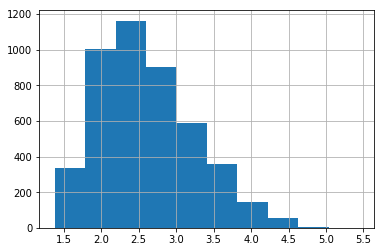

In [31]:
df_autoenc[1].hist()

##  Merging

In [14]:
zeros_df['useful'] = 0
ones_df['useful'] = 1
df_merged = pd.concat([zeros_df, ones_df])

In [15]:
del zeros_df
del ones_df

In [16]:
df_feats = df

In [39]:
df_feats = df_autoenc

In [35]:
df_feats = pd.concat([df, df_autoenc.drop('theorem', axis=1)], axis=1)

In [17]:
def map_features(thm_prem_pairs):
    df_values = pd.merge(
        thm_prem_pairs, df_feats,
        left_on=['theorem'],
        right_on=['theorem']
    )
    df_values = pd.merge(
        df_values, df_feats,
        left_on=['premise'],
        right_on=['theorem'],
        suffixes=('_prem', '_thm')
    ).drop(['theorem_thm'], axis=1).rename(columns={'theorem_prem': 'theorem'})
    return df_values

In [18]:
df_train = map_features(df_merged)
df_train.head()

,theorem,premise,useful,feat_0_prem,feat_1_prem,feat_2_prem,feat_3_prem,feat_4_prem,feat_6_prem,feat_7_prem,...,feat_10209_thm,feat_10211_thm,feat_10216_thm,feat_10218_thm,feat_10221_thm,feat_10224_thm,feat_10227_thm,feat_10230_thm,feat_10235_thm,feat_10238_thm
0,t100_tmap_1,d1_connsp_2,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,t10_connsp_2,d1_connsp_2,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,t13_tmap_1,d1_connsp_2,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,t20_waybel_0,d1_connsp_2,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,t25_waybel_7,d1_connsp_2,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df_train.shape

(246897, 9539)

In [42]:
from sklearn.datasets import dump_svmlight_file
dump_svmlight_file(df_train.drop(['theorem', 'premise', 'useful'], axis=1), df_train['useful'], 'train_16.libsvm')

KeyboardInterrupt: 

# Training 

In [43]:
import lightgbm as lgb

In [21]:
# train test split
from sklearn.model_selection import train_test_split
train_theorems, test_theorems = train_test_split(df_train['theorem'].unique(), shuffle=True, train_size=0.60)

train = df_train['theorem'].isin(train_theorems)
test = df_train['theorem'].isin(test_theorems)

features = list(df_train.columns.drop(['theorem', 'premise', 'useful']))
y_name = 'useful'

/home/piotrek/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### lgbm

In [33]:
train_data = lgb.Dataset(df_train[train][features], df_train[train][y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )
test_data = lgb.Dataset(df_train[test][features], df_train[test][y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )

In [28]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 60,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'lambda_l2': 0.03,
    'verbose': 1,
    'threads': 6,
    'num_boost_round': 4000,
    'early_stopping_rounds': 300
}
model = lgb.train(
    parameters,
    train_data,
    valid_sets=test_data
)

NameError: name 'train_data' is not defined

In [23]:
model_deep = lgb.Booster(model_file='LGBM_paramsdeep.bst')
model_shallow = lgb.Booster(model_file='LGBM_params_shallow.bst')

In [44]:
preds = model.predict(df_train.drop(['theorem', 'premise', 'useful'], axis=1))

In [22]:
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(df_train['useful'], preds)

0.9691654287887295

### rf

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80, n_jobs=-1)
model.fit(df_train[train][features], df_train[train][y_name])

KeyboardInterrupt: 

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df_train[test][y_name], model.predict_proba(df_train[test][features])[:, 1])

0.9365508414282976

## Production model

In [52]:
train_data = lgb.Dataset(df_train[features], df_train[y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
#   'num_leaves': 60,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'lambda_l2': 0.06,
    'verbose': 1,
    'threads': 6,
    'num_boost_round': 2550
}
model = lgb.train(
    parameters,
    train_data
)

In [45]:
train_data = lgb.Dataset(df_train[features], df_train[y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
   'num_leaves': 60,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'lambda_l2': 0.06,
    'verbose': 1,
    'threads': 6,
    'num_boost_round': 2200
}
model_small = lgb.train(
    parameters,
    train_data
)

/home/piotrek/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model.fit(df_train[features], df_train[y_name])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Suggested premises for new conjectures

In [23]:
conjs = pd.read_csv('../homework2_exercise2/data/conjectures_test', squeeze=True, names=['conjecture'])

In [24]:
#usefulness_threshold = 0.8
def get_premises(conj):
    premises = get_available_theorems(conj)
    premises.name = 'premise'
    premises = premises.to_frame()
    premises['theorem'] = conj
    df_values = map_features(premises)
    
    df_X = df_values.drop(['theorem', 'premise'], axis=1)
    
    #premises['useful'] = (model.predict(df_X) + model_small.predict(df_X)) / 2
    premises['useful'] = model.predict(df_X)
    premises = premises.sort_values(by='useful', ascending=False)
    return premises['premise']
#.head(prem_num)
    #return premises[premises['useful'] > usefulness_threshold]['premise']

In [25]:
import sys
sys.path.append('..')
from homework2_exercise2.run_E_prover import find_proof

In [26]:
statements_path = '../homework2_exercise2/data/statements'
dirpath = '../homework2_exercise2/new_conjectures/'
with open(statements_path, 'r') as f:
    statements_lines = f.read().splitlines()
statements = {}
for l in statements_lines:
    statements[l.split(',')[0].replace('fof(', '')] = l


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
conj_results = []
proved_cnt = 0
for i, conj_name in enumerate(conjs):
    
    print('-' * 20)
    
    premises_for_conj = get_premises(conj_name)
    for j in range(1, 9):
        prem_num = 2**j
        proved = find_proof(conj_name, premises_for_conj.sample(frac=1.0).head(prem_num), statements, dirpath)
        if proved:
            proved_cnt += 1
            break
    if i % 10 == 0:
        print('=' * 20)
        print(f'i={i}, proved {proved_cnt}')
    conj_results.append((conj_name, proved, prem_num))

--------------------
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output 
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output 
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output 
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output 
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output 
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output 
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output 
Proof of conjecture t34_waybel_0 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t22_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_zfmisc_1.E_output 
Proof of conjecture t22_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_zfmisc_1.E_output 
Proof of conjecture t22_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_zfmisc_1.E_output 
Proof of conjecture t22_zfmisc_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t22_zfmisc_1.E_output
--------------------
Proof of conjecture t15_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t15_waybel_0.E_output 
Proof of conjecture t15_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t15_waybel_0.E_output 
Proof of conjecture t15_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t15_waybel_0.E_output 
Proof of conjecture t15_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectur

Proof of conjecture t149_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t149_tmap_1.E_output 
--------------------
Proof of conjecture t67_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_tops_1.E_output 
Proof of conjecture t67_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_tops_1.E_output 
Proof of conjecture t67_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_tops_1.E_output 
Proof of conjecture t67_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_tops_1.E_output 
Proof of conjecture t67_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_tops_1.E_output 
Proof of conjecture t67_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_tops_1.E_output 
Proof of conjecture t67_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_tops_1.E_o

Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_relat_1.E_output 
Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_relat_1.E_output 
Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_relat_1.E_output 
Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_relat_1.E_output 
Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_relat_1.E_output 
Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_relat_1.E_output 
Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_relat_1.E_output 
Proof of conjecture t121_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t121_re

Proof of conjecture t209_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t209_relat_1.E_output 
Proof of conjecture t209_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t209_relat_1.E_output 
Proof of conjecture t209_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t209_relat_1.E_output 
Proof of conjecture t209_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t209_relat_1.E_output 
Proof of conjecture t209_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t209_relat_1.E_output 
Proof of conjecture t209_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t209_relat_1.E_output 
--------------------
Proof of conjecture t71_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t71_xboole_1.E_output 
Proof of conjecture t71_xboole_1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t37_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t37_tmap_1.E_output 
Proof of conjecture t37_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t37_tmap_1.E_output 
Proof of conjecture t37_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t37_tmap_1.E_output 
Proof of conjecture t37_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t37_tmap_1.E_output 
--------------------
Proof of conjecture t22_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_yellow_0.E_output 
Proof of conjecture t22_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_yellow_0.E_output 
Proof of conjecture t22_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_yellow_0.E_output 
Proof of conjecture t22_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t2

Proof of conjecture t152_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t152_relat_1.E_output 
i=50, proved 14
--------------------
Proof of conjecture t20_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t20_yellow_0.E_output 
Proof of conjecture t20_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t20_yellow_0.E_output 
Proof of conjecture t20_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t20_yellow_0.E_output 
Proof of conjecture t20_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t20_yellow_0.E_output 
Proof of conjecture t20_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t20_yellow_0.E_output 
Proof of conjecture t20_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t20_yellow_0.E_output 
Proof of conjecture t20_yellow_0 NOT found. Output saved in file ../homewo

Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 
Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 
Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 
Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 
Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 
Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 
Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 
Proof of conjecture t24_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_mcart_1.E_output 


Proof of conjecture t137_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t137_enumset1.E_output 
Proof of conjecture t137_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t137_enumset1.E_output 
Proof of conjecture t137_enumset1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t137_enumset1.E_output
--------------------
Proof of conjecture t90_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t90_xboole_1.E_output 
Proof of conjecture t90_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t90_xboole_1.E_output 
Proof of conjecture t90_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t90_xboole_1.E_output 
Proof of conjecture t90_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t90_xboole_1.E_output 
Proof of conjecture t90_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_con

Proof of conjecture t9_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t9_tmap_1.E_output 
--------------------
Proof of conjecture t62_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t62_pre_topc.E_output 
Proof of conjecture t62_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t62_pre_topc.E_output 
Proof of conjecture t62_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t62_pre_topc.E_output 
Proof of conjecture t62_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t62_pre_topc.E_output 
Proof of conjecture t62_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t62_pre_topc.E_output 
Proof of conjecture t62_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t62_pre_topc.E_output 
Proof of conjecture t62_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conj

Proof of conjecture t75_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_xboole_1.E_output 
Proof of conjecture t75_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_xboole_1.E_output 
Proof of conjecture t75_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_xboole_1.E_output 
Proof of conjecture t75_xboole_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t75_xboole_1.E_output
--------------------
Proof of conjecture t60_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t60_relat_1.E_output 
Proof of conjecture t60_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t60_relat_1.E_output 
Proof of conjecture t60_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t60_relat_1.E_output 
Proof of conjecture t60_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t60_

Proof of conjecture t93_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_tops_1.E_output 
Proof of conjecture t93_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_tops_1.E_output 
Proof of conjecture t93_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_tops_1.E_output 
Proof of conjecture t93_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_tops_1.E_output 
--------------------
Proof of conjecture t65_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t65_mcart_1.E_output 
Proof of conjecture t65_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t65_mcart_1.E_output 
Proof of conjecture t65_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t65_mcart_1.E_output 
Proof of conjecture t65_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t65_mcart

Proof of conjecture t34_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_filter_1.E_output 
Proof of conjecture t34_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_filter_1.E_output 
Proof of conjecture t34_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_filter_1.E_output 
Proof of conjecture t34_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_filter_1.E_output 
Proof of conjecture t34_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_filter_1.E_output 
Proof of conjecture t34_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_filter_1.E_output 
Proof of conjecture t34_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t34_filter_1.E_output 
--------------------
Proof of conjecture t28_subset_1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t46_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t46_ordinal1.E_output 
Proof of conjecture t46_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t46_ordinal1.E_output 
Proof of conjecture t46_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t46_ordinal1.E_output 
Proof of conjecture t46_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t46_ordinal1.E_output 
Proof of conjecture t46_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t46_ordinal1.E_output 
--------------------
Proof of conjecture t41_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t41_lattice3.E_output 
Proof of conjecture t41_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t41_lattice3.E_output 
Proof of conjecture t41_lattice3 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t101_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t101_zfmisc_1.E_output 
Proof of conjecture t101_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t101_zfmisc_1.E_output 
--------------------
Proof of conjecture t79_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t79_tex_2.E_output 
Proof of conjecture t79_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t79_tex_2.E_output 
Proof of conjecture t79_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t79_tex_2.E_output 
Proof of conjecture t79_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t79_tex_2.E_output 
Proof of conjecture t79_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t79_tex_2.E_output 
Proof of conjecture t79_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t79_tex_2.E_out

Proof of conjecture t37_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t37_orders_2.E_output 
Proof of conjecture t37_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t37_orders_2.E_output 
--------------------
Proof of conjecture t213_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t213_relat_1.E_output 
Proof of conjecture t213_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t213_relat_1.E_output 
Proof of conjecture t213_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t213_relat_1.E_output 
Proof of conjecture t213_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t213_relat_1.E_output 
Proof of conjecture t213_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t213_relat_1.E_output 
Proof of conjecture t213_relat_1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t63_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_funct_1.E_output 
Proof of conjecture t63_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_funct_1.E_output 
Proof of conjecture t63_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_funct_1.E_output 
Proof of conjecture t63_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_funct_1.E_output 
Proof of conjecture t63_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_funct_1.E_output 
--------------------
Proof of conjecture t8_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_lattice3.E_output 
Proof of conjecture t8_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_lattice3.E_output 
Proof of conjecture t8_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t

Proof of conjecture t60_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t60_funct_2.E_output 
Proof of conjecture t60_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t60_funct_2.E_output 
--------------------
Proof of conjecture t93_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_relat_1.E_output 
Proof of conjecture t93_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_relat_1.E_output 
Proof of conjecture t93_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_relat_1.E_output 
Proof of conjecture t93_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_relat_1.E_output 
Proof of conjecture t93_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t93_relat_1.E_output 
Proof of conjecture t93_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t

Proof of conjecture t22_waybel_9 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_waybel_9.E_output 
Proof of conjecture t22_waybel_9 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_waybel_9.E_output 
Proof of conjecture t22_waybel_9 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_waybel_9.E_output 
Proof of conjecture t22_waybel_9 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_waybel_9.E_output 
Proof of conjecture t22_waybel_9 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_waybel_9.E_output 
--------------------
Proof of conjecture t45_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t45_mcart_1.E_output 
Proof of conjecture t45_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t45_mcart_1.E_output 
Proof of conjecture t45_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_con

Proof of conjecture t26_compts_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t26_compts_1.E_output 
Proof of conjecture t26_compts_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t26_compts_1.E_output 
Proof of conjecture t26_compts_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t26_compts_1.E_output 
Proof of conjecture t26_compts_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t26_compts_1.E_output 
Proof of conjecture t26_compts_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t26_compts_1.E_output 
--------------------
Proof of conjecture t56_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t56_setfam_1.E_output 
Proof of conjecture t56_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t56_setfam_1.E_output 
Proof of conjecture t56_setfam_1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t47_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t47_relat_1.E_output 
--------------------
Proof of conjecture t50_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_orders_2.E_output 
Proof of conjecture t50_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_orders_2.E_output 
Proof of conjecture t50_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_orders_2.E_output 
Proof of conjecture t50_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_orders_2.E_output 
Proof of conjecture t50_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_orders_2.E_output 
Proof of conjecture t50_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_orders_2.E_output 
Proof of conjecture t50_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_

Proof of conjecture t29_wellord2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_wellord2.E_output 
Proof of conjecture t29_wellord2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_wellord2.E_output 
Proof of conjecture t29_wellord2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_wellord2.E_output 
Proof of conjecture t29_wellord2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_wellord2.E_output 
Proof of conjecture t29_wellord2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_wellord2.E_output 
Proof of conjecture t29_wellord2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_wellord2.E_output 
--------------------
Proof of conjecture t81_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t81_tops_1.E_output 
Proof of conjecture t81_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conj

Proof of conjecture t38_waybel_7 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t38_waybel_7.E_output 
Proof of conjecture t38_waybel_7 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t38_waybel_7.E_output 
Proof of conjecture t38_waybel_7 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t38_waybel_7.E_output 
Proof of conjecture t38_waybel_7 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t38_waybel_7.E_output 
--------------------
Proof of conjecture t16_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t16_tex_2.E_output 
Proof of conjecture t16_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t16_tex_2.E_output 
Proof of conjecture t16_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t16_tex_2.E_output 
Proof of conjecture t16_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t16_tex

Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 
Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 
Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 
Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 
Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 
Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 
Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 
Proof of conjecture t49_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_mcart_1.E_output 


Proof of conjecture t17_yellow_6 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_yellow_6.E_output 
Proof of conjecture t17_yellow_6 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_yellow_6.E_output 
Proof of conjecture t17_yellow_6 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_yellow_6.E_output 
Proof of conjecture t17_yellow_6 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_yellow_6.E_output 
Proof of conjecture t17_yellow_6 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_yellow_6.E_output 
--------------------
Proof of conjecture t45_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t45_ordinal1.E_output 
Proof of conjecture t45_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t45_ordinal1.E_output 
Proof of conjecture t45_ordinal1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yellow_0.E_output 
Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yellow_0.E_output 
Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yellow_0.E_output 
Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yellow_0.E_output 
Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yellow_0.E_output 
Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yellow_0.E_output 
Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yellow_0.E_output 
Proof of conjecture t43_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t43_yel

Proof of conjecture t47_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t47_orders_2.E_output 
Proof of conjecture t47_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t47_orders_2.E_output 
Proof of conjecture t47_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t47_orders_2.E_output 
Proof of conjecture t47_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t47_orders_2.E_output 
--------------------
Proof of conjecture t119_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t119_relat_1.E_output 
Proof of conjecture t119_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t119_relat_1.E_output 
Proof of conjecture t119_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t119_relat_1.E_output 
Proof of conjecture t119_relat_1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t97_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t97_funct_1.E_output 
Proof of conjecture t97_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t97_funct_1.E_output 
Proof of conjecture t97_funct_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t97_funct_1.E_output
--------------------
Proof of conjecture t5_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t5_waybel_0.E_output 
Proof of conjecture t5_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t5_waybel_0.E_output 
Proof of conjecture t5_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t5_waybel_0.E_output 
Proof of conjecture t5_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t5_waybel_0.E_output 
Proof of conjecture t5_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t5_waybel_0.

Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
Proof of conjecture t32_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t32_tex_2.E_output 
--------------------
Proof of co

Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 
Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 
Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 
Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 
Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 
Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 
Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 
Proof of conjecture t91_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t91_relat_1.E_output 


Proof of conjecture t68_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_mcart_1.E_output 
Proof of conjecture t68_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_mcart_1.E_output 
Proof of conjecture t68_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_mcart_1.E_output 
Proof of conjecture t68_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_mcart_1.E_output 
Proof of conjecture t68_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_mcart_1.E_output 
Proof of conjecture t68_mcart_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_mcart_1.E_output 
--------------------
Proof of conjecture t10_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t10_wellord1.E_output 
Proof of conjecture t10_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjecture

Proof of conjecture t40_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t40_funct_1.E_output 
Proof of conjecture t40_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t40_funct_1.E_output 
Proof of conjecture t40_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t40_funct_1.E_output 
Proof of conjecture t40_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t40_funct_1.E_output 
--------------------
Proof of conjecture t138_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t138_funct_1.E_output 
Proof of conjecture t138_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t138_funct_1.E_output 
Proof of conjecture t138_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t138_funct_1.E_output 
Proof of conjecture t138_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjec

Proof of conjecture t193_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t193_funct_2.E_output 
Proof of conjecture t193_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t193_funct_2.E_output 
Proof of conjecture t193_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t193_funct_2.E_output 
--------------------
Proof of conjecture t29_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_tops_1.E_output 
Proof of conjecture t29_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_tops_1.E_output 
Proof of conjecture t29_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_tops_1.E_output 
Proof of conjecture t29_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_tops_1.E_output 
Proof of conjecture t29_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_

Proof of conjecture t123_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t123_funct_1.E_output 
Proof of conjecture t123_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t123_funct_1.E_output 
Proof of conjecture t123_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t123_funct_1.E_output 
--------------------
Proof of conjecture t74_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_tops_2.E_output 
Proof of conjecture t74_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_tops_2.E_output 
Proof of conjecture t74_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_tops_2.E_output 
Proof of conjecture t74_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_tops_2.E_output 
Proof of conjecture t74_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_

Proof of conjecture t84_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t84_zfmisc_1.E_output 
Proof of conjecture t84_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t84_zfmisc_1.E_output 
--------------------
Proof of conjecture t8_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_filter_1.E_output 
Proof of conjecture t8_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_filter_1.E_output 
Proof of conjecture t8_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_filter_1.E_output 
Proof of conjecture t8_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_filter_1.E_output 
Proof of conjecture t8_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_filter_1.E_output 
Proof of conjecture t8_filter_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectur

Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 
Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 
Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 
Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 
Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 
Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 
Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 
Proof of conjecture t89_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t89_funct_1.E_output 


Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 
Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 
Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 
Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 
Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 
Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 
Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 
Proof of conjecture t18_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t18_relat_1.E_output 


Proof of conjecture t102_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t102_enumset1.E_output 
Proof of conjecture t102_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t102_enumset1.E_output 
Proof of conjecture t102_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t102_enumset1.E_output 
Proof of conjecture t102_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t102_enumset1.E_output 
Proof of conjecture t102_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t102_enumset1.E_output 
Proof of conjecture t102_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t102_enumset1.E_output 
Proof of conjecture t102_enumset1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t102_enumset1.E_output
--------------------
Proof of conjecture t110_relat_1 NOT found. Output saved in file ../homework2_exercise2

Proof of conjecture t23_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_setfam_1.E_output 
Proof of conjecture t23_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_setfam_1.E_output 
Proof of conjecture t23_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_setfam_1.E_output 
Proof of conjecture t23_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_setfam_1.E_output 
Proof of conjecture t23_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_setfam_1.E_output 
--------------------
Proof of conjecture t125_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t125_relat_1.E_output 
Proof of conjecture t125_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t125_relat_1.E_output 
Proof of conjecture t125_relat_1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t150_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t150_funct_1.E_output 
Proof of conjecture t150_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t150_funct_1.E_output 
Proof of conjecture t150_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t150_funct_1.E_output 
Proof of conjecture t150_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t150_funct_1.E_output 
Proof of conjecture t150_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t150_funct_1.E_output 
--------------------
Proof of conjecture t103_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t103_xboole_1.E_output 
Proof of conjecture t103_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t103_xboole_1.E_output 
Proof of conjecture t103_xboole_1 NOT found. Output saved in file ../homework2_exercis

Proof of conjecture t128_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t128_tmap_1.E_output 
Proof of conjecture t128_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t128_tmap_1.E_output 
Proof of conjecture t128_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t128_tmap_1.E_output 
--------------------
Proof of conjecture t22_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_relat_1.E_output 
Proof of conjecture t22_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_relat_1.E_output 
Proof of conjecture t22_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_relat_1.E_output 
Proof of conjecture t22_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t22_relat_1.E_output 
Proof of conjecture t22_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t

Proof of conjecture t122_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t122_relat_1.E_output 
i=340, proved 58
--------------------
Proof of conjecture t201_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t201_relat_1.E_output 
Proof of conjecture t201_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t201_relat_1.E_output 
Proof of conjecture t201_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t201_relat_1.E_output 
Proof of conjecture t201_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t201_relat_1.E_output 
Proof of conjecture t201_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t201_relat_1.E_output 
Proof of conjecture t201_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t201_relat_1.E_output 
Proof of conjecture t201_relat_1 NOT found. Output saved in file ../homew

Proof of conjecture t55_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t55_tmap_1.E_output 
--------------------
Proof of conjecture t23_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_wellord1.E_output 
Proof of conjecture t23_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_wellord1.E_output 
Proof of conjecture t23_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_wellord1.E_output 
Proof of conjecture t23_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_wellord1.E_output 
Proof of conjecture t23_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_wellord1.E_output 
Proof of conjecture t23_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_wellord1.E_output 
Proof of conjecture t23_wellord1 NOT found. Output saved in file ../homework2_exercise2/new_co

Proof of conjecture t51_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_lattice3.E_output 
Proof of conjecture t51_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_lattice3.E_output 
Proof of conjecture t51_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_lattice3.E_output 
Proof of conjecture t51_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_lattice3.E_output 
Proof of conjecture t51_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_lattice3.E_output 
Proof of conjecture t51_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_lattice3.E_output 
Proof of conjecture t51_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_lattice3.E_output 
--------------------
Proof of conjecture t32_funct_2 NOT found. Output saved in file ../homework2_exercise2/new

Proof of conjecture t116_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t116_tmap_1.E_output 
Proof of conjecture t116_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t116_tmap_1.E_output 
Proof of conjecture t116_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t116_tmap_1.E_output 
Proof of conjecture t116_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t116_tmap_1.E_output 
Proof of conjecture t116_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t116_tmap_1.E_output 
Proof of conjecture t116_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t116_tmap_1.E_output 
--------------------
Proof of conjecture t2_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t2_lattice3.E_output 
Proof of conjecture t2_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t

Proof of conjecture t92_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t92_enumset1.E_output 
Proof of conjecture t92_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t92_enumset1.E_output 
Proof of conjecture t92_enumset1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t92_enumset1.E_output
--------------------
Proof of conjecture t75_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_tex_2.E_output 
Proof of conjecture t75_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_tex_2.E_output 
Proof of conjecture t75_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_tex_2.E_output 
Proof of conjecture t75_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_tex_2.E_output 
Proof of conjecture t75_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t75_tex_2.E_output 
Proo

Proof of conjecture t4_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t4_setfam_1.E_output 
--------------------
Proof of conjecture t81_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t81_xboole_1.E_output 
Proof of conjecture t81_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t81_xboole_1.E_output 
Proof of conjecture t81_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t81_xboole_1.E_output 
Proof of conjecture t81_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t81_xboole_1.E_output 
Proof of conjecture t81_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t81_xboole_1.E_output 
Proof of conjecture t81_xboole_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t81_xboole_1.E_output
--------------------
Proof of conjecture t57_funct_1 NOT found. Output saved in file ../homework2_exerc

Proof of conjecture t19_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t19_ordinal1.E_output 
Proof of conjecture t19_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t19_ordinal1.E_output 
i=390, proved 68
--------------------
Proof of conjecture t107_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t107_enumset1.E_output 
Proof of conjecture t107_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t107_enumset1.E_output 
Proof of conjecture t107_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t107_enumset1.E_output 
Proof of conjecture t107_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t107_enumset1.E_output 
Proof of conjecture t107_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t107_enumset1.E_output 
Proof of conjecture t107_enumset1 NOT found. Output saved in fi

Proof of conjecture t147_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t147_zfmisc_1.E_output 
Proof of conjecture t147_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t147_zfmisc_1.E_output 
Proof of conjecture t147_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t147_zfmisc_1.E_output 
Proof of conjecture t147_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t147_zfmisc_1.E_output 
Proof of conjecture t147_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t147_zfmisc_1.E_output 
--------------------
Proof of conjecture t142_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t142_zfmisc_1.E_output 
Proof of conjecture t142_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t142_zfmisc_1.E_output 
Proof of conjecture t142_zfmisc_1 NOT found. Output saved in file ../homewor

Proof of conjecture t55_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t55_tops_2.E_output 
Proof of conjecture t55_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t55_tops_2.E_output 
Proof of conjecture t55_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t55_tops_2.E_output 
Proof of conjecture t55_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t55_tops_2.E_output 
Proof of conjecture t55_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t55_tops_2.E_output 
--------------------
Proof of conjecture t153_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t153_tmap_1.E_output 
Proof of conjecture t153_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t153_tmap_1.E_output 
Proof of conjecture t153_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t153_tmap_1

Proof of conjecture t24_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_ordinal1.E_output 
Proof of conjecture t24_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_ordinal1.E_output 
Proof of conjecture t24_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_ordinal1.E_output 
Proof of conjecture t24_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t24_ordinal1.E_output 
--------------------
Proof of conjecture t50_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_tex_2.E_output 
Proof of conjecture t50_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_tex_2.E_output 
Proof of conjecture t50_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_tex_2.E_output 
Proof of conjecture t50_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_tex

Proof of conjecture t68_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tops_1.E_output 
Proof of conjecture t68_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tops_1.E_output 
Proof of conjecture t68_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tops_1.E_output 
--------------------
Proof of conjecture t152_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t152_funct_1.E_output 
Proof of conjecture t152_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t152_funct_1.E_output 
Proof of conjecture t152_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t152_funct_1.E_output 
Proof of conjecture t152_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t152_funct_1.E_output 
Proof of conjecture t152_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjecture

Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yellow19.E_output 
Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yellow19.E_output 
Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yellow19.E_output 
Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yellow19.E_output 
Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yellow19.E_output 
Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yellow19.E_output 
Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yellow19.E_output 
Proof of conjecture t36_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t36_yel

Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enumset1.E_output 
Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enumset1.E_output 
Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enumset1.E_output 
Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enumset1.E_output 
Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enumset1.E_output 
Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enumset1.E_output 
Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enumset1.E_output 
Proof of conjecture t61_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_enu

Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lattices.E_output 
Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lattices.E_output 
Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lattices.E_output 
Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lattices.E_output 
Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lattices.E_output 
Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lattices.E_output 
Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lattices.E_output 
Proof of conjecture t31_lattices NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t31_lat

Proof of conjecture t3_yellow_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t3_yellow_1.E_output 
Proof of conjecture t3_yellow_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t3_yellow_1.E_output 
Proof of conjecture t3_yellow_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t3_yellow_1.E_output 
--------------------
Proof of conjecture t76_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t76_waybel_0.E_output 
Proof of conjecture t76_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t76_waybel_0.E_output 
Proof of conjecture t76_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t76_waybel_0.E_output 
Proof of conjecture t76_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t76_waybel_0.E_output 
Proof of conjecture t76_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conj

Proof of conjecture t63_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_tops_2.E_output 
--------------------
Proof of conjecture t30_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t30_orders_2.E_output 
Proof of conjecture t30_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t30_orders_2.E_output 
Proof of conjecture t30_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t30_orders_2.E_output 
Proof of conjecture t30_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t30_orders_2.E_output 
Proof of conjecture t30_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t30_orders_2.E_output 
Proof of conjecture t30_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t30_orders_2.E_output 
Proof of conjecture t30_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_co

Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
Proof of conjecture t68_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t68_tex_2.E_output 
--------------------
Proof of co

Proof of conjecture t58_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t58_yellow_0.E_output 
Proof of conjecture t58_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t58_yellow_0.E_output 
Proof of conjecture t58_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t58_yellow_0.E_output 
Proof of conjecture t58_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t58_yellow_0.E_output 
Proof of conjecture t58_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t58_yellow_0.E_output 
Proof of conjecture t58_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t58_yellow_0.E_output 
Proof of conjecture t58_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t58_yellow_0.E_output 
--------------------
Proof of conjecture t96_enumset1 NOT found. Output saved in file ../homework2_exercise2/ne

Proof of conjecture t10_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t10_yellow_0.E_output 
Proof of conjecture t10_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t10_yellow_0.E_output 
Proof of conjecture t10_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t10_yellow_0.E_output 
Proof of conjecture t10_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t10_yellow_0.E_output 
Proof of conjecture t10_yellow_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t10_yellow_0.E_output 
i=490, proved 84
--------------------
Proof of conjecture t139_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t139_tmap_1.E_output 
Proof of conjecture t139_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t139_tmap_1.E_output 
Proof of conjecture t139_tmap_1 NOT found. Output saved in file ../homework2_

Proof of conjecture t74_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_relat_1.E_output 
Proof of conjecture t74_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_relat_1.E_output 
Proof of conjecture t74_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t74_relat_1.E_output 
--------------------
Proof of conjecture t77_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t77_enumset1.E_output 
Proof of conjecture t77_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t77_enumset1.E_output 
Proof of conjecture t77_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t77_enumset1.E_output 
Proof of conjecture t77_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t77_enumset1.E_output 
Proof of conjecture t77_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conj

In [37]:
pd.DataFrame(conj_results)[1].mean()

0.174

In [38]:
pd.DataFrame(conj_results).to_csv('results_2_4_8_random.csv')

In [22]:
conj_name

NameError: name 'conj_name' is not defined

In [78]:
premises_for_conj.shape

(4,)

In [55]:
conj_name in premises_for_conj

False

In [59]:
chronology[(chronology == 't5_funct_2')]

1478    t5_funct_2
Name: chronology, dtype: object

In [57]:
(premises_for_conj == 't5_funct_2').sum()

1

In [53]:
conj_name

't5_funct_2'

In [48]:
a.shape

(195, 3)

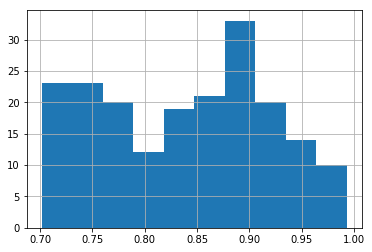

In [49]:
a['useful'].hist()

In [45]:
a['useful'].quantile(0.95)


0.6479658909399986

In [32]:
available_premises_for_conj(conjs[0]).to_frame()

/home/piotrek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


,premises
0,dt_k5_xboole_0
1,dt_k4_xboole_0
2,idempotence_k2_xboole_0
3,d3_xboole_0
4,commutativity_k5_xboole_0
5,d5_xboole_0
6,d6_xboole_0
7,antisymmetry_r2_hidden
8,commutativity_k2_xboole_0
9,dt_k2_xboole_0


In [57]:
available_premises_for_conj('t57_tmap_1').tail()

/home/piotrek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


4561          fc6_yellow19
4562    dt_o_2_13_yellow19
4563          t38_yellow19
4564          t34_waybel_0
4565            t5_funct_2
dtype: object

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

In [11]:
df = pd.DataFrame([[1,2], [1,3],[3,5], [2,4]])
df.head()

,0,1
0,1,2
1,1,3
2,3,5
3,2,4


In [26]:
split = train_test_split(df[0].unique(), shuffle=True)

In [27]:
df[df[0].isin(split[0])]

,0,1
2,3,5
3,2,4


In [28]:
df

,0,1
0,1,2
1,1,3
2,3,5
3,2,4


In [77]:
df_train.shape

(82299, 9745)